## This notebook illustrates unfolding using the RooUnfold methods 

In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)

Welcome to JupyROOT 6.15/01


In [2]:
from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex

/mnt/c/Users/marratia/Linux/buildroot/lib/ROOT.py:579: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


In [3]:
ROOT.gInterpreter.ProcessLine('#include "MyTUnfoldDensity.h"')


0L

In [4]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [5]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    
    if(isMC):
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [6]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q2'].describe()
    return

In [7]:
def getData(inputFiles):
    
    cols = []
    scalar = []  
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')

    
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [8]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [9]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>10', 'e_pt >10')
    temp = applyCut(temp, 'jet_pt>5', 'jet_pt>5')
    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## Get dataframes

In [10]:
df = getData(['data.root'])
df = applyCuts(df)

mc = getData(['mc.root'])
mc = applyCuts(mc)


Processed data.root in 0.3 seconds
0.2 < y < 0.7 170849  fraction kept: 100.0
Q2>150 170849  fraction kept: 100.0
e_pt >10 137246  fraction kept: 80.3

Processed mc.root in 0.1 seconds
0.2 < y < 0.7 118567  fraction kept: 100.0
Q2>150 118567  fraction kept: 100.0
e_pt >10 97889  fraction kept: 82.6


In [11]:
df_jet      = getJetData(['data.root'])
df_jet = applyCutsJets(df_jet)

mc_jet = getJetData(['mc.root'],isMC=True)
mc_jet = applyCutsJets(mc_jet, isMC=True)


Processed data.root in 2.5 seconds
0.2 < y < 0.7 82882  fraction kept: 100.0
Q2>150 82882  fraction kept: 100.0
e_pt >10 70103  fraction kept: 84.6
jet_pt>5 70103  fraction kept: 100.0

Processed mc.root in 2.9 seconds
0.2 < y < 0.7 145313  fraction kept: 100.0
Q2>150 145313  fraction kept: 100.0
e_pt >10 125072  fraction kept: 86.1
jet_pt>5 125072  fraction kept: 100.0


## define variables, binning, etc

In [210]:

#minval = 2.5
#maxval = np.pi
#variable    = 'jet_dphi' 
#genvariable = 'genjet_dphi'

#minval = 0.0
#maxval = 10
#variable = 'jet_qt'
#genvariable = 'genjet_qt'

#minval = 0.0 
#maxval = 1.0
#variable = 'jet_qtnormept'
#genvariable = 'genjet_qtnormept'


coarsebins = 10
finebins = 10
minval = 0.0
maxval = 1.0
variable = 'jet_qtnormjetpt'
genvariable = 'genjet_qtnormjetpt'
namevariable = r'$q_{T}/p_{T}^{jet}$'

#coarsebins = 10
#finebins = 10
#minval = 0
#maxval = 1.0
#variable = 'jet_z'
#genvariable = 'genjet_z'
#namevariable = r'$z_{jet}$'


binwidth = (maxval - minval)/coarsebins

M = ROOT.TH2D("M", "Response Matrix", coarsebins,minval,maxval, finebins,minval,maxval)
M1 = M.Clone("M1")
M2 = M.Clone("M2")
M1.SetTitle("+1#sigma")
M2.SetTitle("-1#sigma")

scaleup = 1.001
scaledn = 0.999

eptmin = 15
eptmax = 20

Warning in <TROOT::Append>: Replacing existing TH1: M (Potential memory leak).


## make data selection, split MC in two statistically independent samples

In [211]:
data_cut = df_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(eptmin,eptmax))
mc_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(eptmin,eptmax))
print len(mc_cut)
msk = np.random.rand(len(mc_cut)) < 0.5
mctest_cut = mc_cut[msk]
mc_cut   = mc_cut[~msk]
print len(mctest_cut)
print len(mc_cut)

29316
14655
14661


<function matplotlib.pyplot.hist>

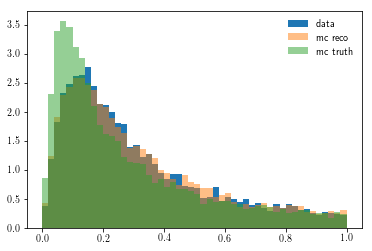

In [212]:
plt.hist(data_cut[variable],range=(0,1),bins=50,normed=True,label='data')
plt.hist(mc_cut[variable],range=(0,1),bins=50,normed=True,alpha=0.5,label='mc reco')
plt.hist(mc_cut[genvariable],range=(0,1),bins=50, normed=True,alpha=0.5,label =' mc truth')
plt.legend(loc='best', frameon=False)
plt.hist

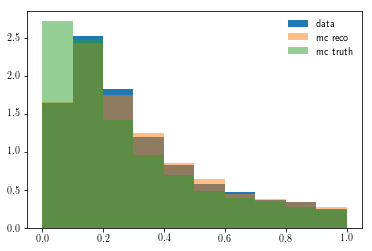

In [213]:
plt.hist(data_cut[variable],range=(0,maxval),bins=coarsebins,normed=True,label='data')
plt.hist(mc_cut[variable],range=(0,maxval),bins=coarsebins,normed=True,alpha=0.5,label='mc reco')
plt.hist(mc_cut[genvariable],range=(0,maxval),bins=coarsebins, normed=True,alpha=0.5,label =' mc truth')
plt.legend(loc='best', frameon=False)


## Fill response matrix

In [214]:
Npe = len(mc_cut[variable])

for i in np.arange(len(mc_cut[variable])):
    x = mc_cut.iloc[i][variable]
    y = mc_cut.iloc[i][genvariable]
    M.Fill(x, y, 1./Npe)
#
#plt.hist(df_cut['jet_qt'],bins=10,range=(0,10.0),normed=True,alpha=0.9, label='MC reco',histtype='step',lw=2)


## Plot response matrix

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0


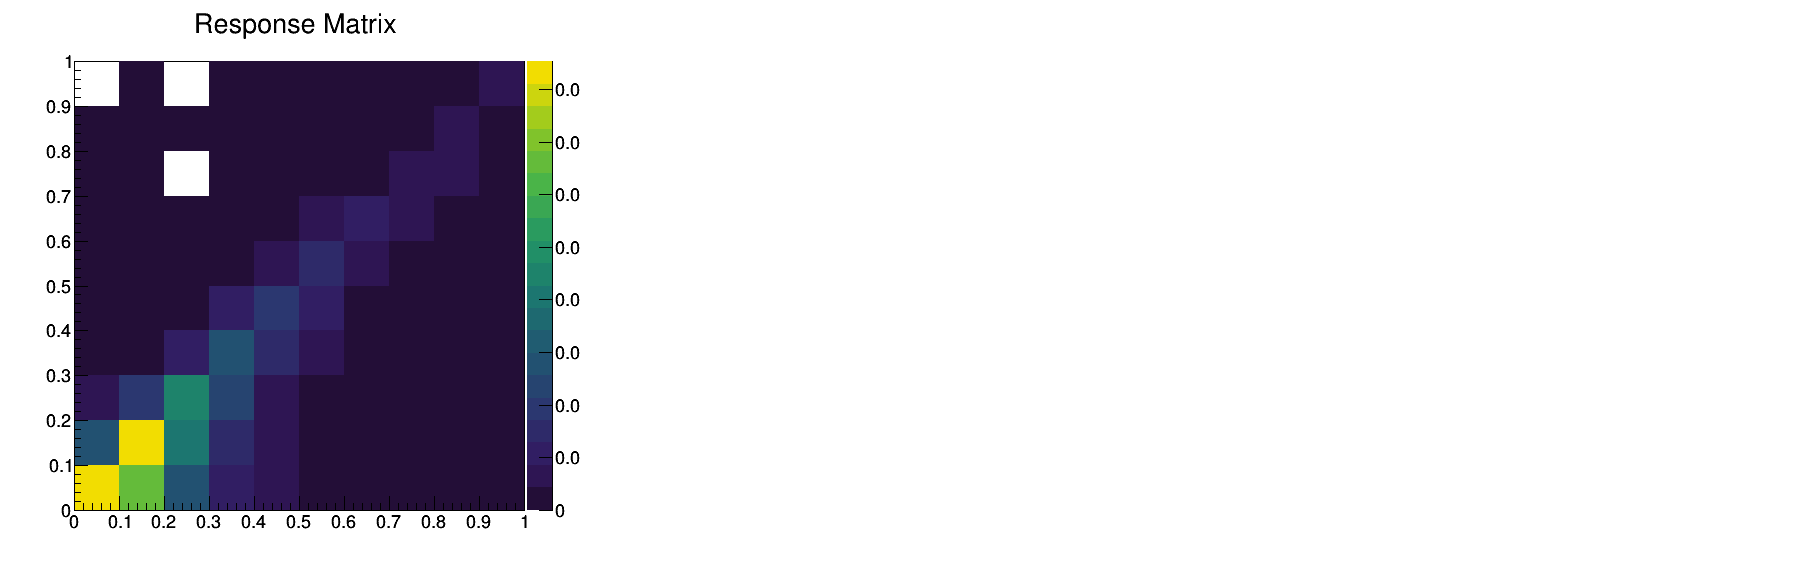

In [215]:
ROOT.gStyle.SetOptStat("")
ROOT.gStyle.SetPalette(ROOT.kViridis);
ROOT.gStyle.SetTitleYOffset(0.85)
ROOT.gStyle.SetEndErrorSize(10)


c0 = ROOT.TCanvas("c0", "c0", 1800, 600)
c0.Divide(3,1)
c0.cd(1)
M.Draw("colz")
c0.Draw()

## fill mc truth and mc reco histograms

In [216]:
h_mcreco = ROOT.TH1D("h_mcreco", "h_mcreco", finebins, minval, maxval)
h_mctrue = ROOT.TH1D("h_mctrue", "h_mctrue", finebins, minval, maxval)

   
for i in np.arange(len(mc_cut[variable])):
    h_mctrue.Fill(mc_cut.iloc[i][genvariable])
    h_mcreco.Fill(mc_cut.iloc[i][variable])


Warning in <TROOT::Append>: Replacing existing TH1: h_mcreco (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_mctrue (Potential memory leak).


## Create data histogram and pseudodata histogram 

In [217]:
h_fakedata = ROOT.TH1D("h_fakedata", "h_fakedata", finebins, minval, maxval)   
    
for i in np.arange(len(mctest_cut[variable])):
    h_fakedata.Fill(mctest_cut.iloc[i][variable])
    
    
    
h_data = ROOT.TH1D("h_data", "h_data", finebins, minval, maxval)   
for i in np.arange(len(data_cut[variable])):
    h_data.Fill(data_cut.iloc[i][variable])

Warning in <TROOT::Append>: Replacing existing TH1: h_fakedata (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_fakedata (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_data (Potential memory leak).


## Plot mc truth, mc reco, data, and pseudodata

Warning in <TCanvas::Constructor>: Deleting canvas with same name: creco


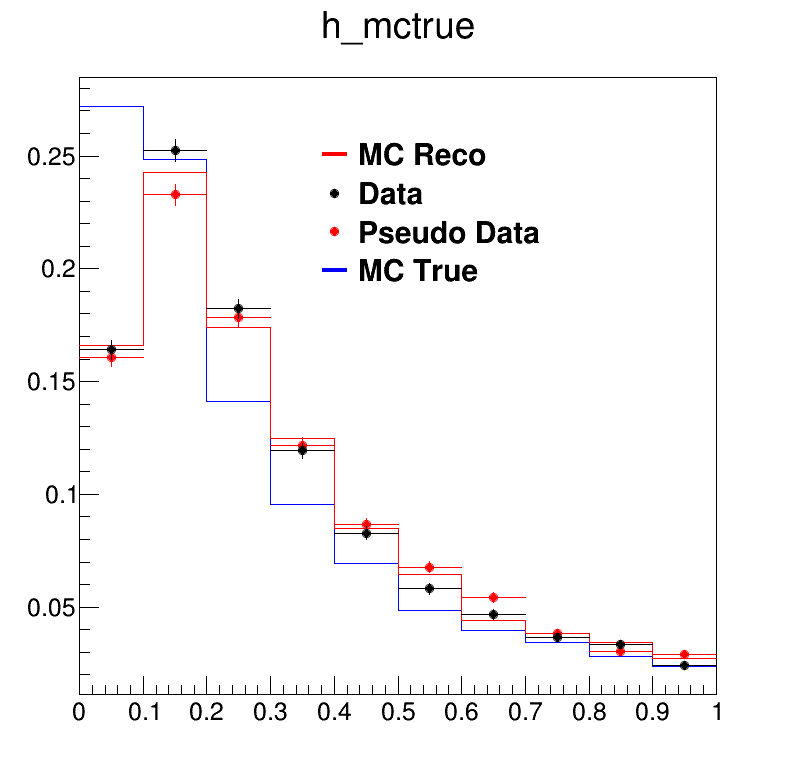

In [218]:
#h_mcreco.SetMarkerStyle(20)
h_data.SetMarkerStyle(20)
h_data.SetMarkerColor(ROOT.kBlack)
h_data.SetLineColor(ROOT.kBlack)

#h_mctrue.SetMarkerStyle(21)
h_fakedata.SetMarkerColor(ROOT.kRed)
h_fakedata.SetLineColor(ROOT.kRed)

h_fakedata.SetLineWidth(1)

h_fakedata.SetMarkerStyle(20)
h_mctrue.SetLineColor(ROOT.kBlue)
h_mcreco.SetLineColor(ROOT.kRed)
#h_fakedata.SetLineColor(ROOT.kBlue)
#h_mctrue.SetLineColor(ROOT.kRed)

creco = ROOT.TCanvas("creco", "creco", 800, 800)
h_mctrue.DrawNormalized()
h_mctrue.SetMinimum(0.0)
h_mcreco.DrawNormalized('same')
h_fakedata.DrawNormalized("e same")
h_data.DrawNormalized("e same")

creco.Draw()

ROOT.gStyle.SetOptStat("")


label = Legend("")
label.Add( h_mcreco, 'MC Reco', 'L')
label.Add(h_data, 'Data','P')
label.Add(h_fakedata, 'Pseudo Data', 'P')
label.Add( h_mctrue, 'MC True', 'L')
label.Draw(.4,.85)


## Load modules needed for the unfolding

In [219]:
ROOT.gSystem.Load("/mnt/c/Users/marratia/Linux/RooUnfold/libRooUnfold")
from ROOT import gRandom, TH1, TH1D, TH2D, cout, THStack
#for unfolding
from ROOT import RooUnfoldResponse
from ROOT import RooUnfold
from ROOT import RooUnfoldBayes
from ROOT import RooUnfoldSvd
from ROOT import RooUnfoldTUnfold
from ROOT import RooUnfoldBinByBin
from ROOT import RooUnfoldIds

from AtlasCommonUtils import SetAtlasStyle
from Legend import Legend
from ROOT import TLatex

In [220]:
responseMatrix = M

## Plot response matrix and projections

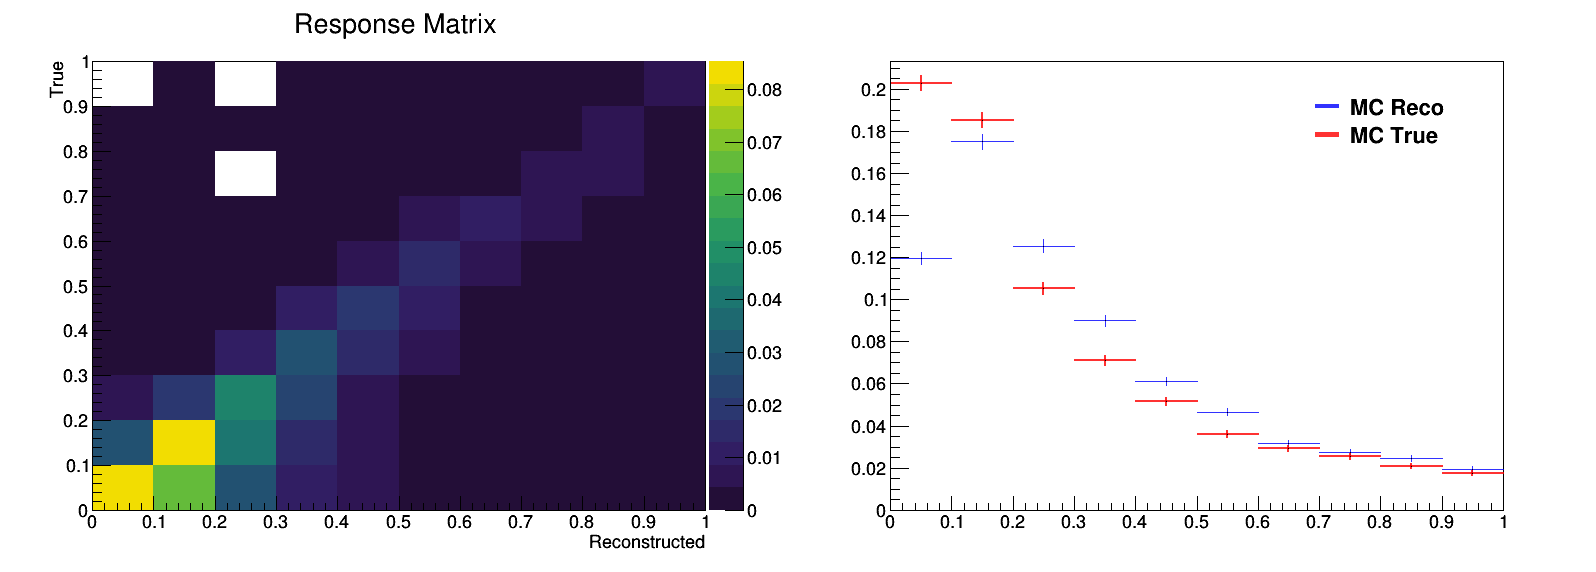

In [221]:
mc_truth = responseMatrix.ProjectionY()
mc_reco = responseMatrix.ProjectionX()
mc_truth.SetLineColorAlpha(2,0.8)
mc_reco.SetLineColorAlpha(4,0.8)

##draw mc truth, mc reco, response matrix
c = ROOT.TCanvas('c','c',1600,600)
c.Divide(2)
c.cd(1)
responseMatrix.Draw('colz')
responseMatrix.SetTitle('Response Matrix; Reconstructed; True')

#ROOT.gPad.SetLogz()
c.cd(2)


label = Legend("")
label.Add(mc_reco,'MC Reco','L')
label.Add(mc_truth,'MC True','L')

hs_mc = ROOT.THStack()
hs_mc.Add(mc_reco)
hs_mc.Add(mc_truth)
hs_mc.Draw('nostack')
#hs_mc.SetTitle(axestitle[variable])

label.Draw(0.65,.87)
c.Draw()

## Perform unfolding

In [222]:
data_inputforunfolding = h_data.Clone()
#data_inputforunfolding = h_fakedata.Clone()

response= RooUnfoldResponse(mc_reco, mc_truth, responseMatrix,"response","response")
response.UseOverflow()

data_unfolded = {}
ErrorMatrices = {}
unfold = {}

nbayes_iter = 12
unfold['Bayes'] = RooUnfoldBayes(response, data_inputforunfolding, nbayes_iter)
#RooUnfoldTUnfold(response, data_inputforunfolding) # 
unfold['Bayes'].IncludeSystematics()


data_unfolded['Bayes'] = unfold['Bayes'].Hreco();
ErrorMatrices['Bayes'] = unfold['Bayes'].Ereco();
unfold['Bayes'].PrintTable (cout, mc_truth)


Now unfolding...
Iteration : 0
Chi^2 of change 55.9621
Iteration : 1
Chi^2 of change 4.61722
Iteration : 2
Chi^2 of change 1.22214
Iteration : 3
Chi^2 of change 0.565463
Iteration : 4
Chi^2 of change 0.356531
Iteration : 5
Chi^2 of change 0.269737
Iteration : 6
Chi^2 of change 0.222303
Iteration : 7
Chi^2 of change 0.190195
Iteration : 8
Chi^2 of change 0.165711
Iteration : 9
Chi^2 of change 0.145966
Iteration : 10
Chi^2 of change 0.129622
Iteration : 11
Chi^2 of change 0.115904
Calculating covariances due to number of measured events
Calculating covariance due to unfolding matrix...
covariance matrix condition=-1, determinant=0, tolerance=2.22045e-16
Inverse covariance matrix 100% maximum error
         Train    Train     Test     Test Unfolded  Error on     Diff     Pull
  Bin    Truth Measured    Truth    Input   Output Unfolding
    0        0        0        0        0      0.0       0.0
    1        0        0        0     1623   2719.3     124.4   2719.1     21.9
    2        0 

## Error matrix

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


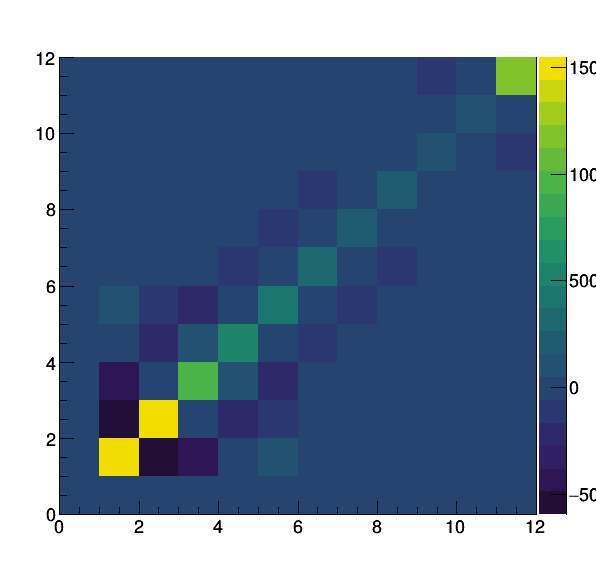

In [223]:
c = ROOT.TCanvas('c','c',600,600)
ErrorMatrices['Bayes'].Draw("colz")
c.Draw()

In [224]:

def GetCorrelationMatrix ( cov, name):

    nrows= cov.GetNrows()
    ncolumns = cov.GetNcols()
    
    h= ROOT.TH2D (name, "", nrows, 0, nrows, ncolumns, 0, ncolumns);
    h.SetAxisRange (-1.0, 1.0, "Z")
    for i in range(nrows) :
        for j in range(ncolumns) :
            Viijj= cov(i,i)*cov(j,j)
            if Viijj>0.0: h.SetBinContent (i+1, j+1, cov(i,j)/ROOT.TMath.Sqrt(Viijj))
            
    return h

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


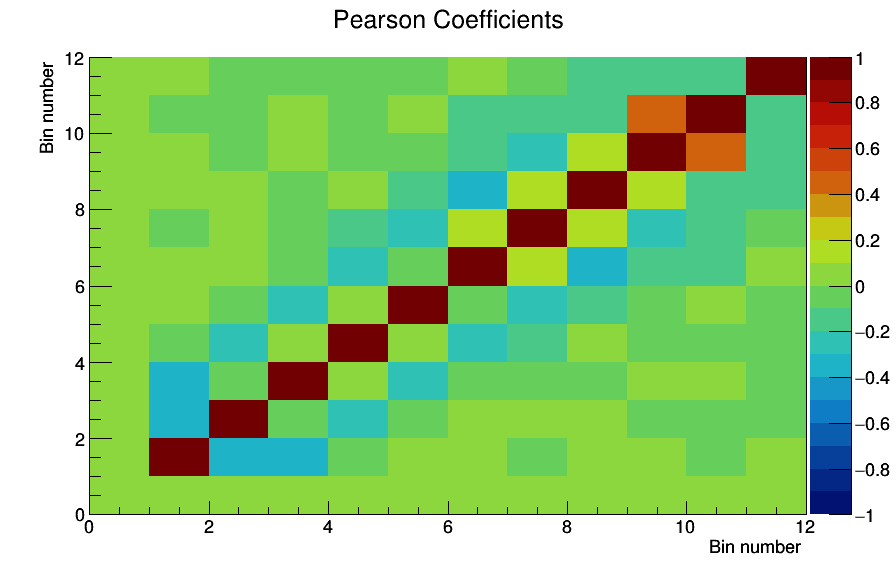

In [225]:
ROOT.gStyle.SetPalette(ROOT.kRainBow);

c = ROOT.TCanvas('c','c',900,600)
correlation = {}

correlation['Bayes'] = GetCorrelationMatrix(ErrorMatrices['Bayes'], 'Bayes')
correlation['Bayes'].Draw('colz')
#correlation['Bayes'].GetXaxis().SetRangeUser(1,7)
#correlation['Bayes'].GetYaxis().SetRangeUser(1,7)
correlation['Bayes'].GetXaxis().SetTitle('Bin number')
correlation['Bayes'].GetYaxis().SetTitle('Bin number')
correlation['Bayes'].SetTitle('Pearson Coefficients')

c.Draw()

## Compare data after unfolded, data at reconstructed level, and MC truth

Bayes   1   0.05  0.268  0.012
Bayes   2   0.15  0.270  0.012
Bayes   3   0.25  0.152  0.010
Bayes   4   0.35  0.087  0.007
Bayes   5   0.45  0.063  0.006
Bayes   6   0.55  0.042  0.005
Bayes   7   0.65  0.043  0.005
Bayes   8   0.75  0.033  0.004
Bayes   9   0.85  0.024  0.004
Bayes   10   0.95  0.018  0.003
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[0.26792325 0.27031634 0.151621   0.08667485 0.06326101 0.04226103
 0.04295436 0.0328313  0.02397201 0.01818485]
[0.01225717 0.0119083  0.00957356 0.00685136 0.00627546 0.00506159
 0.00480377 0.00419299 0.0036788  0.00288048]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


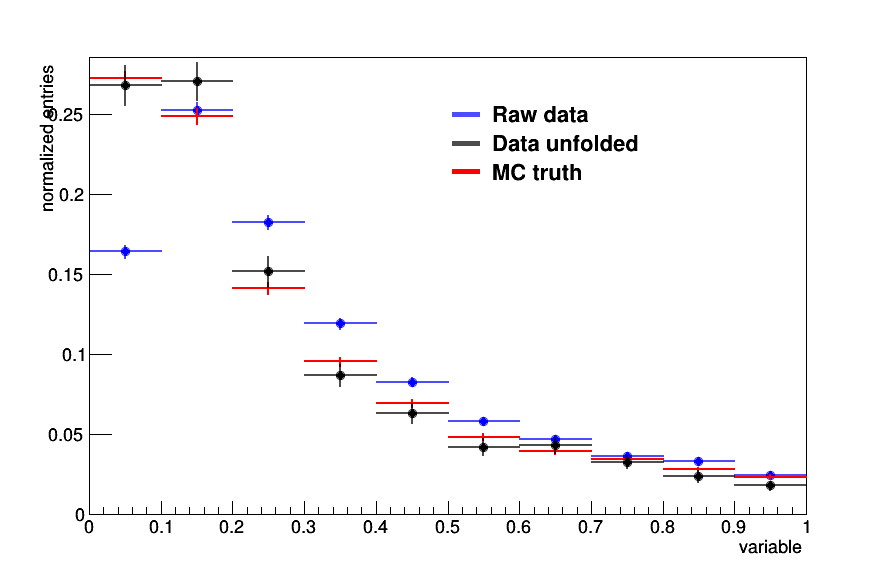

In [226]:
c = ROOT.TCanvas('c','c',900,600)

label = Legend("")
alpha = 0.7
hstack = ROOT.THStack()
h_data.SetLineWidth(2)
h_data.SetLineColorAlpha(4,alpha)
h_data.SetMarkerColor(4)
mc_truth.SetLineColor(2)
mc_truth.SetLineWidth(2)
mc_truth.SetMarkerColor(2)

h_data.SetMarkerStyle(20)

color = {}
color['Bayes'] = 1

h_data.Scale(1.0/h_data.Integral())
mc_truth.Scale(1.0/mc_truth.Integral())


result_x = np.array([])
result_y = np.array([])
result_erry = np.array([])

for key in ['Bayes']:
    data_unfolded[key].SetMarkerStyle(20)
    data_unfolded[key].SetLineWidth(2)
    data_unfolded[key].SetLineColorAlpha(color[key],alpha)
    data_unfolded[key].SetMarkerColor(color[key])
    data_unfolded[key].Scale(1.0/data_unfolded[key].Integral())

    for i in range(1,data_unfolded[key].GetNbinsX()+1):
        print key, ' ' , i , ' ', data_unfolded[key].GetBinCenter(i), ' %2.3f'%data_unfolded[key].GetBinContent(i), ' %2.3f'%data_unfolded[key].GetBinError(i)
        result_x = np.append(result_x, data_unfolded[key].GetBinCenter(i))
        result_y = np.append(result_y, data_unfolded[key].GetBinContent(i))
        result_erry = np.append(result_erry, data_unfolded[key].GetBinError(i))
hstack.Add(h_data)
hstack.Add(mc_truth)
hstack.Add(data_unfolded['Bayes'])
label.Add(h_data, 'Raw data', 'L')
label.Add(data_unfolded['Bayes'],'Data unfolded','L')      
label.Add(mc_truth, 'MC truth', 'L')

hstack.SetTitle('; variable; normalized entries')
hstack.Draw('nostack')
hstack.GetYaxis().SetNdivisions(6)
label.Draw(.5,.85)

c.Draw()
print result_x
print result_y
print result_erry
#c.SaveAs('Unfoldedresult%s.pdf'%(datatype))

## Closure test: feed pseudodata (MC) to the unfolding and test whether it is compatible with the truth distribution

In [227]:
#data_inputforunfolding = h_data.Clone()
data_inputforunfolding = h_fakedata.Clone()

response= RooUnfoldResponse(mc_reco, mc_truth, responseMatrix,"response","response")
#response.UseOverflow()

nbayes_iter = 3
closure = RooUnfoldBayes(response, data_inputforunfolding, nbayes_iter).Hreco();


Now unfolding...
Iteration : 0
Chi^2 of change 31.6064
Iteration : 1
Chi^2 of change 6.23215
Iteration : 2
Chi^2 of change 2.54119
Calculating covariances due to number of measured events


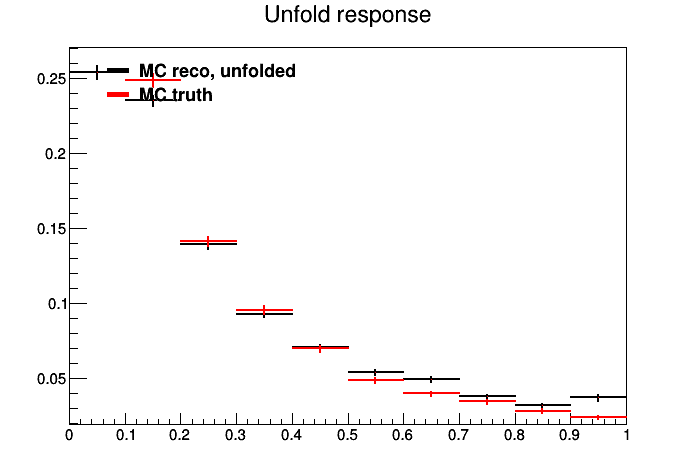

In [228]:
c = ROOT.TCanvas()
closure.SetLineColor(1)
closure.SetMarkerColor(2)
closure.Scale(1/closure.Integral())
closure.Draw()
mc_truth.Draw('same')
label = Legend("")
label.Add(closure, 'MC reco, unfolded', 'L')
label.Add(mc_truth, 'MC truth' ,     'L')
label.Draw(.15,.90)

c.Draw()

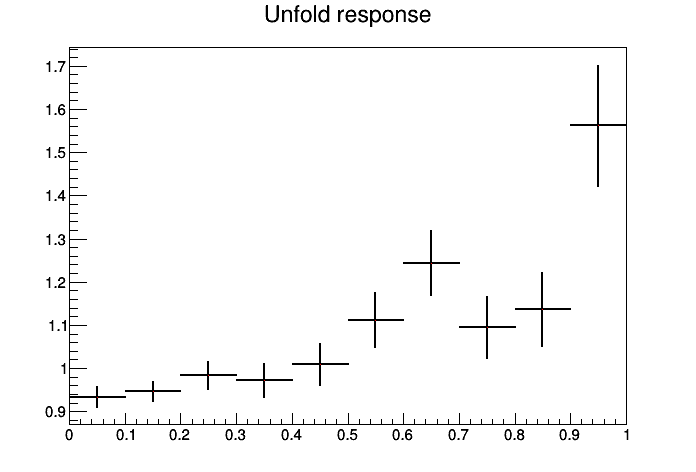

In [229]:
closure.Divide(mc_truth)
c = ROOT.TCanvas()
closure.Draw()
c.Draw()

## Multiply the unfolded result by the response matrix, compare with data. This is the "refolded check"

In [230]:
def Refold ( response, unfolded):
    nrows= response.GetNbinsX()
    ncolumns = response.GetNbinsX()
    h= unfolded.Clone('refolded')
    for i in range(nrows) :
        temp = 0.0
        for j in range(ncolumns) :
            temp = temp + response.GetBinContent (i+1, j+1)*unfolded.GetBinContent(j+1)
        h.SetBinContent(i+1, temp)
    return h

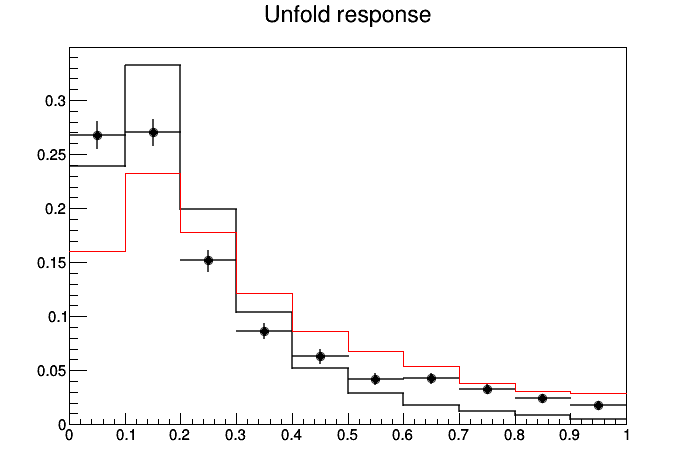

In [231]:
refolded = Refold(responseMatrix,data_unfolded['Bayes'])
c = ROOT.TCanvas()
refolded.DrawNormalized('hist')
data_unfolded['Bayes'].DrawNormalized('same')
data_inputforunfolding.DrawNormalized('same')
c.Draw()

## Plot unfolded result vs MC

17.127508  mean lepton pt
0.37809396  mean inelasticity
20.853493  mean jet p
14.594749  mean jet pT
count    29316.000000
mean        14.594749
std          5.786974
min          5.000011
25%         10.167954
50%         14.656549
75%         18.230238
max         49.601570
Name: jet_pt, dtype: float64
0.0135342395  mean x
500.09366  mean Q2
count    29316.000000
mean       500.093658
std        153.255875
min        281.785370
25%        390.239647
50%        465.341583
75%        568.719543
max       1287.933350
Name: Q2, dtype: float64
###########


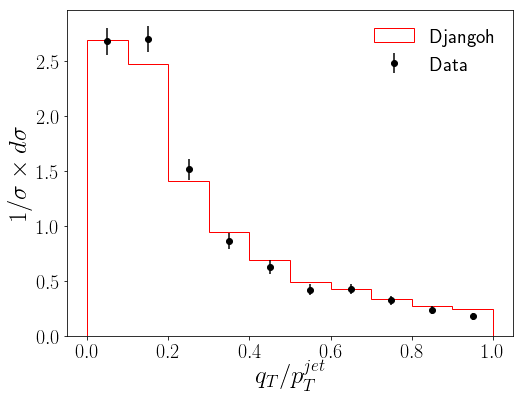

In [232]:
rc('text', usetex=True)


fig = plt.figure(figsize=(8,6))


df_cut = mc_jet.query('e_pt > %2.2f and e_pt<%2.2f'%(eptmin,eptmax))
printSummary(df_cut)
print '###########'
    
plt.hist(df_cut[genvariable],bins=coarsebins,range=(0,maxval),normed=True,histtype='step',color='red',label='Djangoh')    
plt.errorbar(x=result_x,y=np.divide(result_y,binwidth), yerr=np.divide(result_erry,binwidth), fmt='o',ls='none',label='Data',color='black')

plt.xlabel(namevariable, fontsize=25)
plt.ylabel(r'$1/\sigma \times d\sigma$ ', fontsize=25)
#plt.tick_params('both',labelsize=20)

#plt.title('%2.0f< x < %2.0f$'%(eptmin,eptmax) + '$\ \mathrm{ GeV}$ ',fontsize=21)
#plt.text(0.05,1.2, r' $ %2.0f< p_{\mathrm{T}}^{e} < %2.0f$'%(eptmin,eptmax) + '$\ \mathrm{ GeV}$ \n' +
#                      r'$\langle x \rangle = %2.2f, \langle Q^{2} \rangle = %2.0f \ \mathrm{GeV}^{2}$'%(df_cut['x'].mean(), df_cut['Q2'].mean()), fontsize=21)

plt.legend(loc='best',frameon=False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.legend(prop={'size': 20}, frameon=False, loc='best')
#plt.legend(loc='best',frameon=False)
plt.savefig('qtplot.png', bbox_inches='tight')
plt.savefig('qtplot.pdf', bbox_inches='tight')